# Data-Science-Project-Glassdoor-job-Data

In [1]:
#Let us import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

In [2]:
#read data from csv file ..... 
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [4]:
# Knowing each data type columns....
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [5]:
# Some statistics from the dataset 
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


# Data Cleaning

In [6]:
# view missing value count for dataset......
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [7]:
#Ensure that there are no repetitions for dataset.
df.duplicated().sum()

0

In [8]:
# lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head()

,unnamed: 0,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [9]:
#As we have gathered all the data required from both of these columns, drop them
df.drop(labels = ['unnamed: 0'],axis =1 ,inplace = True)

In [10]:
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [11]:
df.corr()

,rating,founded
rating,1.000000,0.484295
founded,0.484295,1.000000


In [12]:
df['salary estimate'].value_counts()

-1                                  214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: salary estimate, Length: 417, dtype: int64

In [13]:
dd = df[df['salary estimate']!= '-1']

In [14]:
df['salary estimate'].value_counts()

-1                                  214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: salary estimate, Length: 417, dtype: int64

In [15]:
salary = df['salary estimate'].apply(lambda e : e.split('(')[0])

In [16]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: salary estimate, Length: 956, dtype: object

In [17]:
salary = salary.apply(lambda x : x.replace('$' ,'').replace('K',''))

In [18]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954         -1
955    61-126 
Name: salary estimate, Length: 956, dtype: object

In [19]:
salary = salary.apply(lambda x: x.lower().replace('employer provided salary:','').replace('per hour:',''))

In [20]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '-1', '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ',

In [21]:
df['min_salary'] = salary.apply(lambda t : t.split('-')[0])

In [22]:
df['max_salary'] = salary.apply(lambda t : t.split('-')[1])

In [23]:
df.dtypes

job title             object
salary estimate       object
job description       object
rating               float64
company name          object
location              object
headquarters          object
size                  object
founded                int64
type of ownership     object
industry              object
sector                object
revenue               object
competitors           object
min_salary            object
max_salary            object
dtype: object

In [24]:
# view missing value count for dataset......
df.isnull().sum()

job title            0
salary estimate      0
job description      0
rating               0
company name         0
location             0
headquarters         0
size                 0
founded              0
type of ownership    0
industry             0
sector               0
revenue              0
competitors          0
min_salary           0
max_salary           0
dtype: int64

In [25]:
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143


In [26]:
df[['company name','rating']].sort_values(by = 'rating' , ascending=True).head(20)

,company name,rating
703,Kronos Bio,-1.0
583,ALIN,-1.0
405,Monte Rosa Therapeutics,-1.0
778,Kronos Bio,-1.0
331,CA-One Tech Cloud,-1.0
424,Decode_M,-1.0
819,Kronos Bio,-1.0
531,OneThree Biotech,-1.0
134,Geomagical Labs,-1.0
121,LEAH Labs,-1.0


In [27]:
df['company_txt'] = df.apply(lambda x : x['company name'] if x['rating']< 0 else  x['company name'][:-4] , axis =1 )

In [28]:
df['location'].value_counts()

New York, NY         78
San Francisco, CA    71
Cambridge, MA        59
Chicago, IL          37
Boston, MA           24
                     ..
Red Bank, NJ          1
San Ramon, CA         1
Woodinville, WA       1
Burlington, MA        1
Michigan              1
Name: location, Length: 237, dtype: int64

In [29]:
df['job_state'] = df['location'].apply(lambda x : x.split(',')[0])

In [30]:
df['job_state']

0      Albuquerque
1        Linthicum
2       Clearwater
3         Richland
4         New York
          ...     
951      Nashville
952     Pittsburgh
953      Allentown
954         Austin
955    Beavercreek
Name: job_state, Length: 956, dtype: object

In [31]:
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,company_txt,job_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,Tecolote Research\r,Albuquerque
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,University of Maryland Medical System\r,Linthicum
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,KnowBe4\r,Clearwater
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,PNNL\r,Richland
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,Affinity Solutions\r,New York


In [32]:
df['same_state'] = df.apply(lambda x: 1 if x.location == x.headquarters else 0, axis = 1)

In [33]:
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,company_txt,job_state,same_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,Tecolote Research\r,Albuquerque,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,University of Maryland Medical System\r,Linthicum,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,KnowBe4\r,Clearwater,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,PNNL\r,Richland,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,Affinity Solutions\r,New York,1


In [34]:
df['age'] = df.founded.apply(lambda x: x if x <1 else 2022 - x)

In [35]:
df.head(20)

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,min_salary,max_salary,company_txt,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,Tecolote Research\r,Albuquerque,0,49
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,University of Maryland Medical System\r,Linthicum,0,38
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,KnowBe4\r,Clearwater,1,12
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,PNNL\r,Richland,1,57
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,Affinity Solutions\r,New York,1,24
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\r\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",71,119,CyrusOne\r,Dallas,1,22
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\r\n\r\n**Please only local can...,4.1,ClearOne Advantage\r\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,54,93,ClearOne Advantage\r,Baltimore,1,14
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\r\nOv...,3.8,Logic20/20\r\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,86,142,Logic20/20\r,San Jose,0,17
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\r\n\r\nThe Research Scientist I will b...,3.3,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,38,84,Rochester Regional Health\r,Rochester,1,8
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\r\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",120,160,<intent>\r,New York,1,13


In [36]:
df['python_yn'] = df['job description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [37]:
df['python_yn'].value_counts()

1    496
0    460
Name: python_yn, dtype: int64

In [38]:
df['R_yn'] = df['job description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['R_yn'].value_counts()

0    954
1      2
Name: R_yn, dtype: int64

In [39]:
df['excel'] = df['job description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [40]:
df['aws'] = df['job description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [41]:
df['spark'] = df['job description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [42]:
# lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head()

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,...,max_salary,company_txt,job_state,same_state,age,python_yn,r_yn,excel,aws,spark
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,Tecolote Research\r,Albuquerque,0,49,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,University of Maryland Medical System\r,Linthicum,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,KnowBe4\r,Clearwater,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,PNNL\r,Richland,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,Affinity Solutions\r,New York,1,24,1,0,1,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job title          956 non-null    object 
 1   salary estimate    956 non-null    object 
 2   job description    956 non-null    object 
 3   rating             956 non-null    float64
 4   company name       956 non-null    object 
 5   location           956 non-null    object 
 6   headquarters       956 non-null    object 
 7   size               956 non-null    object 
 8   founded            956 non-null    int64  
 9   type of ownership  956 non-null    object 
 10  industry           956 non-null    object 
 11  sector             956 non-null    object 
 12  revenue            956 non-null    object 
 13  competitors        956 non-null    object 
 14  min_salary         956 non-null    object 
 15  max_salary         956 non-null    object 
 16  company_txt        956 non

# EDA

<AxesSubplot:>

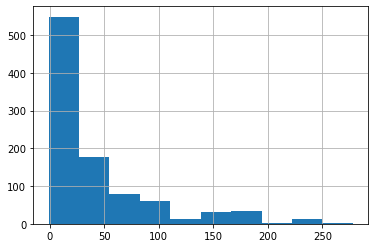

In [43]:
df.age.hist()

<AxesSubplot:>

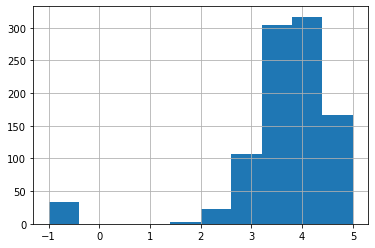

In [44]:
df.rating.hist()

In [56]:

df.job_state.value_counts()


New York         78
San Francisco    71
Cambridge        60
Chicago          37
Boston           24
                 ..
San Ramon         1
Woodinville       1
Burlington        1
Pella             1
Michigan          1
Name: job_state, Length: 227, dtype: int64

<Figure size 1224x432 with 0 Axes>

<AxesSubplot:>

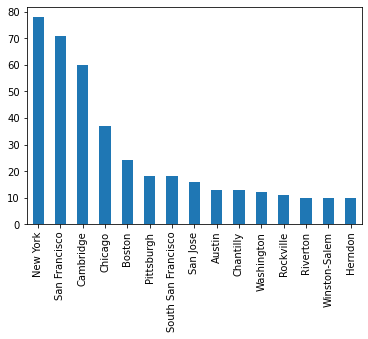

In [58]:
df.job_state.value_counts()[:15].plot(kind = 'bar')

In [81]:
df_cat = df[[ 'python_yn', 'r_yn',
       'spark', 'aws', 'excel']]

C:\Users\AL-FAJR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='python_yn', ylabel='count'>

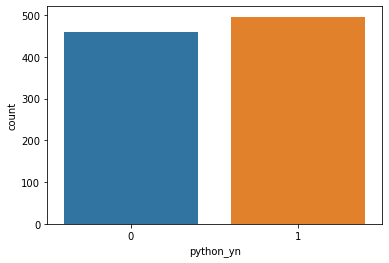

In [86]:
sns.countplot(df.python_yn)

C:\Users\AL-FAJR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aws', ylabel='count'>

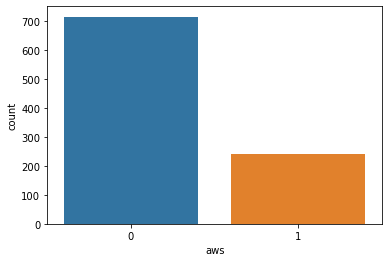

In [87]:
sns.countplot(df.aws)

C:\Users\AL-FAJR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='excel', ylabel='count'>

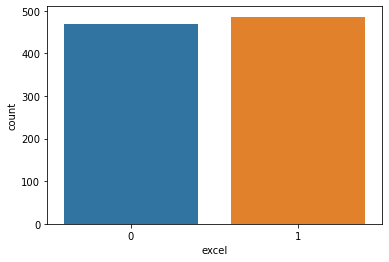

In [88]:
sns.countplot(df.excel)

C:\Users\AL-FAJR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r_yn', ylabel='count'>

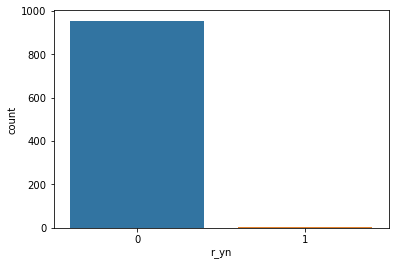

In [89]:
sns.countplot(df.r_yn)

C:\Users\AL-FAJR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spark', ylabel='count'>

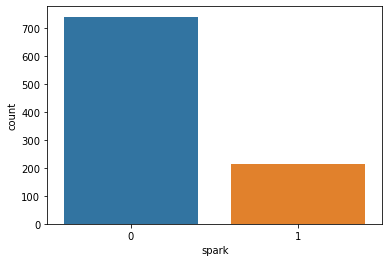

In [90]:
sns.countplot(df.spark)

In [94]:
df.corr()

,rating,founded,same_state,age,python_yn,r_yn,excel,aws,spark
rating,1.000000,0.484295,0.033113,0.047302,0.102566,-0.002199,-0.021981,0.080478,0.065454
founded,0.484295,1.000000,0.142524,0.208101,0.066047,0.016513,-0.029295,-0.007923,0.020874
same_state,0.033113,0.142524,1.000000,-0.102405,-0.009482,-0.047148,0.116731,-0.036313,-0.065948
age,0.047302,0.208101,-0.102405,1.000000,-0.084315,-0.009551,0.037978,-0.045480,-0.075141
python_yn,0.102566,0.066047,-0.009482,-0.084315,1.000000,0.044094,-0.042507,0.165840,0.371526
r_yn,-0.002199,0.016513,-0.047148,-0.009551,0.044094,1.000000,0.045027,-0.026656,-0.024589
excel,-0.021981,-0.029295,0.116731,0.037978,-0.042507,0.045027,1.000000,-0.048242,-0.059187
aws,0.080478,-0.007923,-0.036313,-0.045480,0.165840,-0.026656,-0.048242,1.000000,0.287587
spark,0.065454,0.020874,-0.065948,-0.075141,0.371526,-0.024589,-0.059187,0.287587,1.000000


<AxesSubplot:>

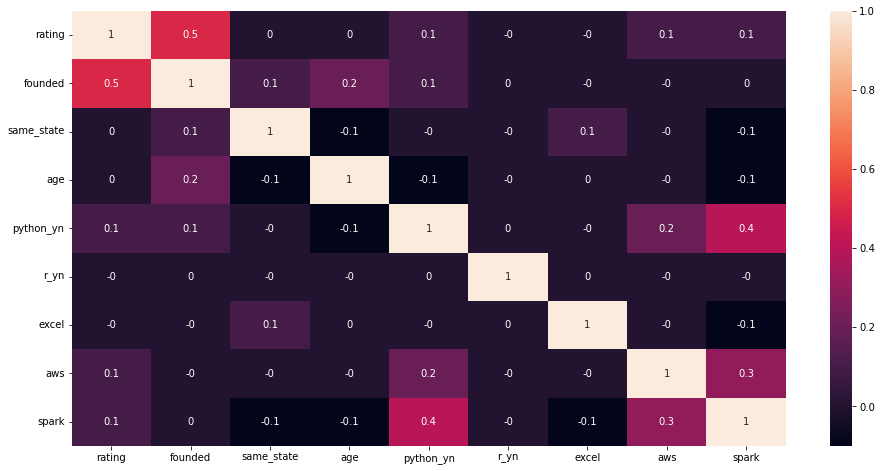

In [98]:
plt.figure(figsize=(16,8))
sns.heatmap(data = round(df.corr() ,1) , annot=True)

In [102]:
df['type of ownership'].value_counts(normalize=True)

Company - Private                 0.556485
Company - Public                  0.247908
Nonprofit Organization            0.067992
Subsidiary or Business Segment    0.041841
Government                        0.017782
Hospital                          0.015690
College / University              0.015690
Unknown                           0.011506
-1                                0.011506
Other Organization                0.005230
Contract                          0.005230
School / School District          0.002092
Private Practice / Firm           0.001046
Name: type of ownership, dtype: float64

In [112]:
df= df[df['type of ownership']!='-1']

<AxesSubplot:ylabel='type of ownership'>

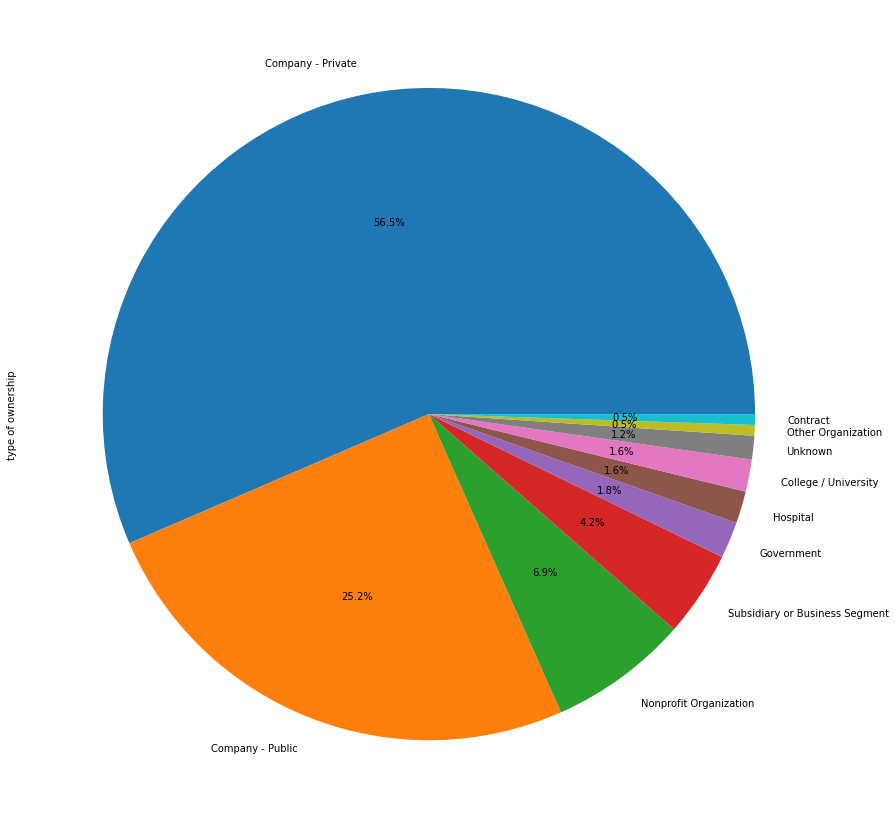

In [113]:
plt.figure(figsize=(20,15))
df['type of ownership'].value_counts()[:10].plot(kind = 'pie' , autopct='%1.1f%%')

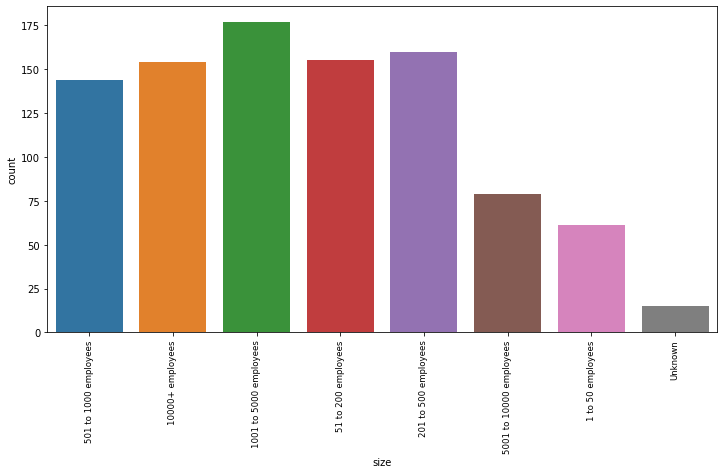

In [117]:
plt.figure(figsize=(12,6))
g=sns.countplot(data = df , x = 'size')
# plt.xticks(routation = 90)
g.set_xticklabels(g.get_xticklabels(),rotation = 90, fontsize = 8.6);

<AxesSubplot:>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


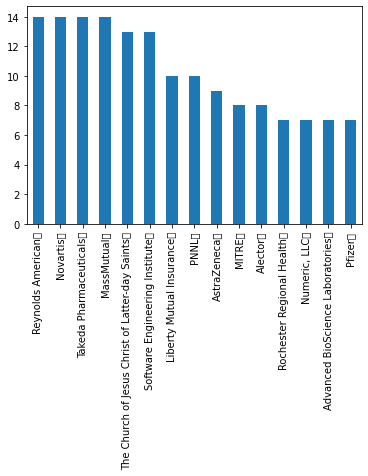

In [118]:
df.company_txt.value_counts()[:15].plot(kind = 'bar')

<AxesSubplot:>

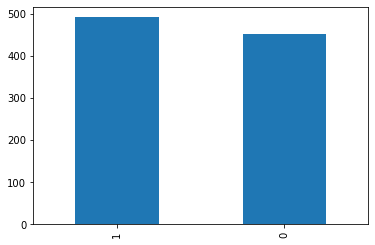

In [119]:
df.same_state.value_counts().plot(kind = 'bar')

In [123]:
df_cat = df[['location', 'headquarters', 'size','type of ownership', 'industry', 'sector', 'revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel']]

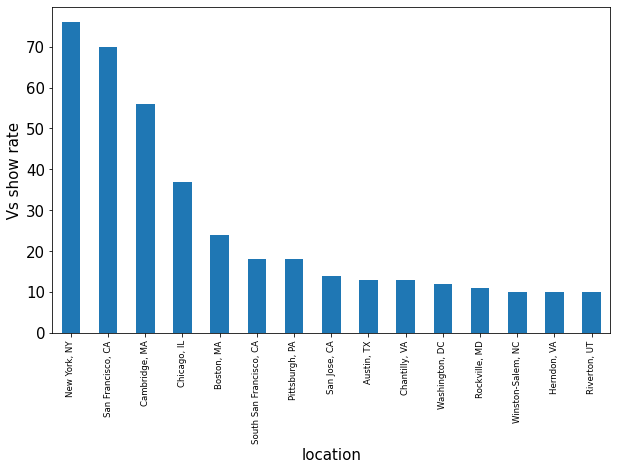

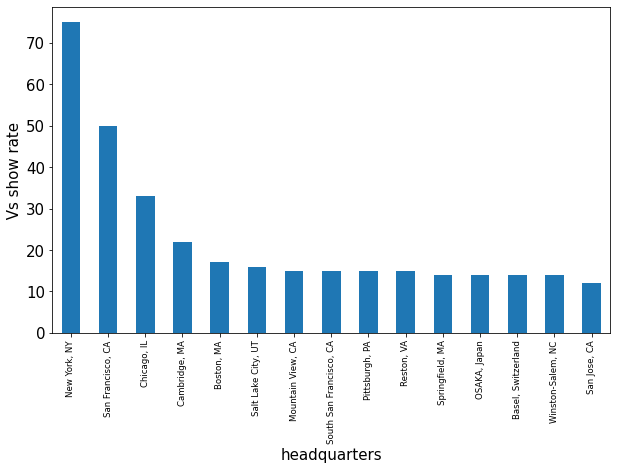

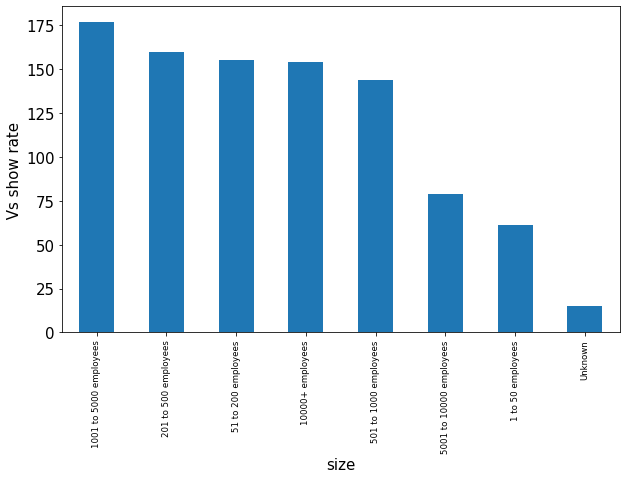

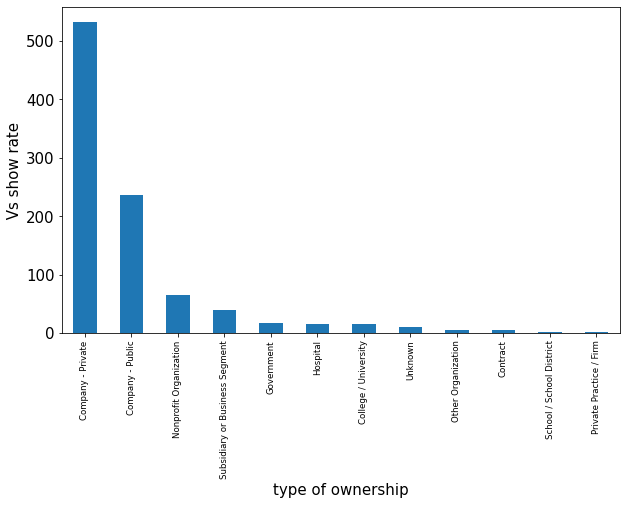

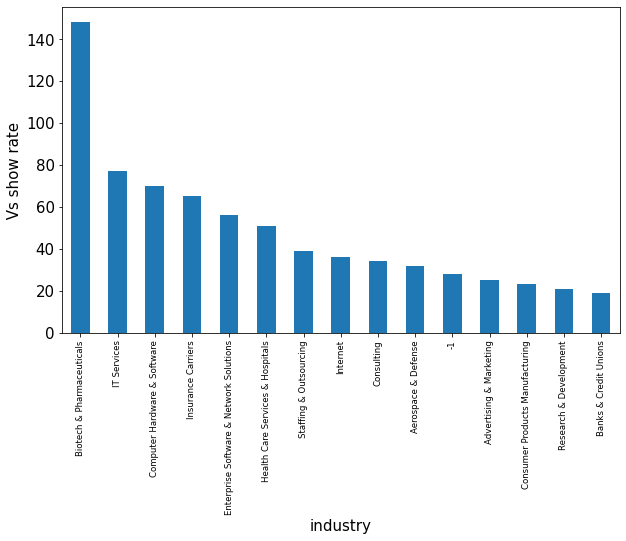

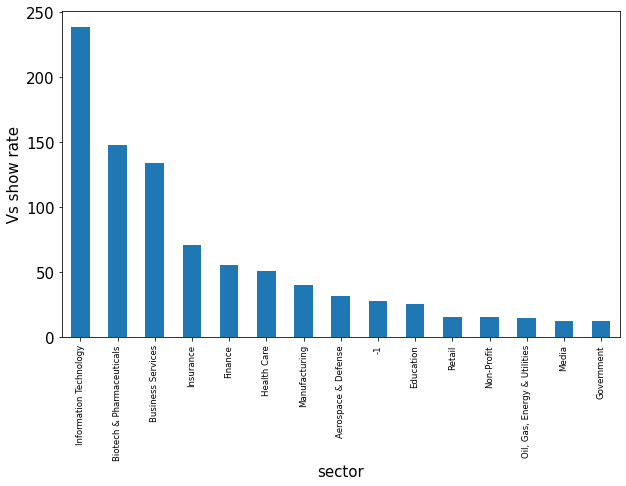

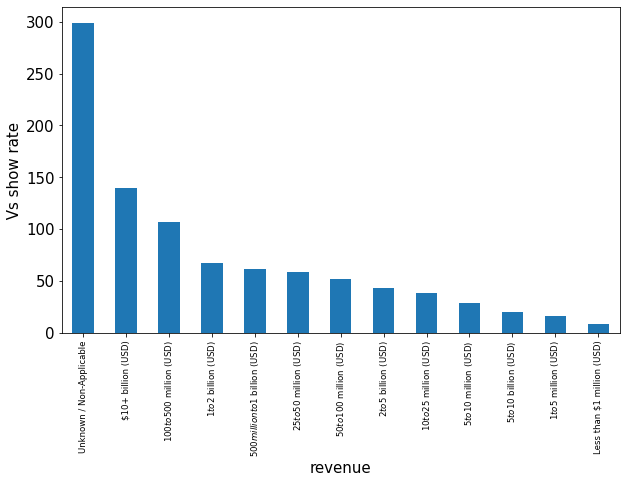

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


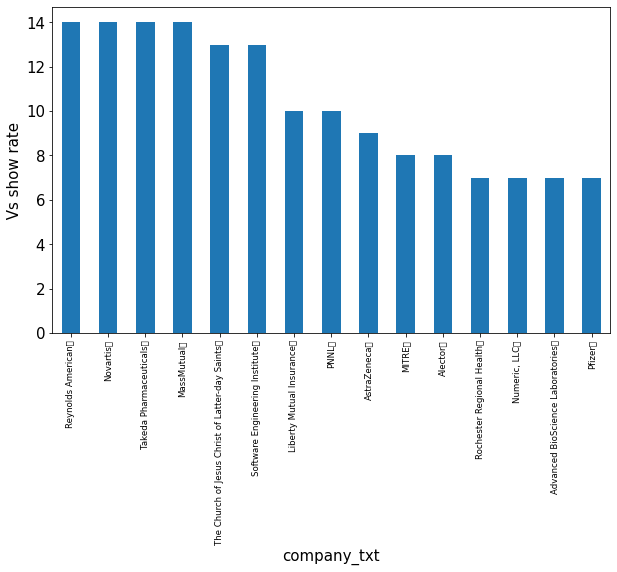

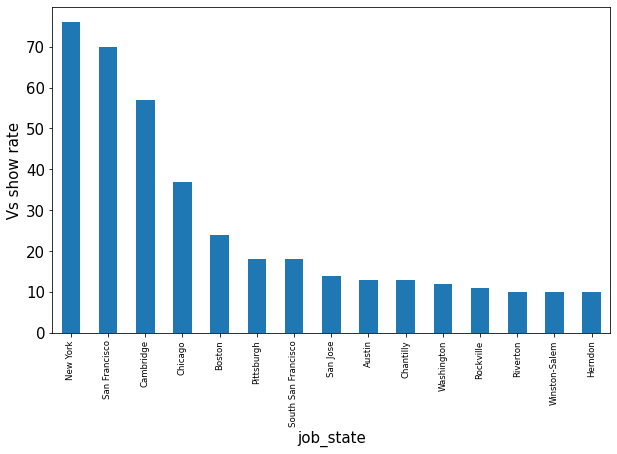

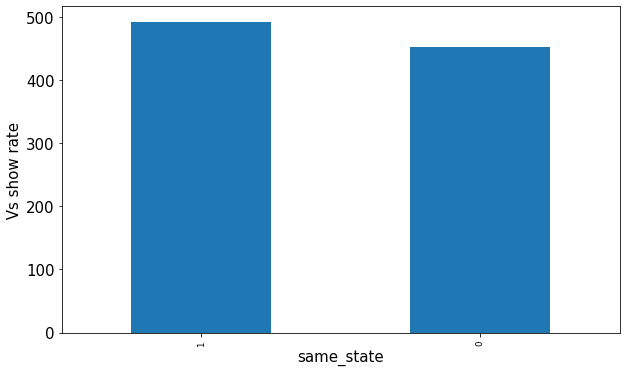

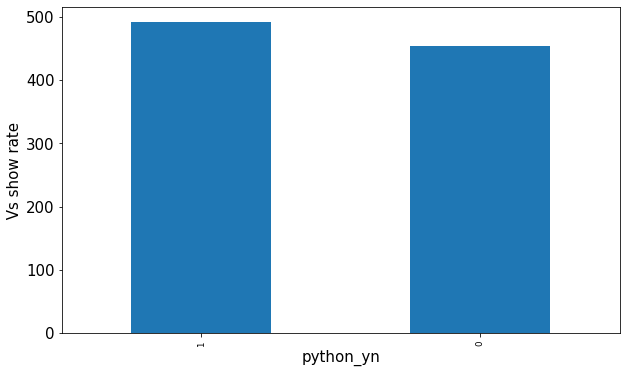

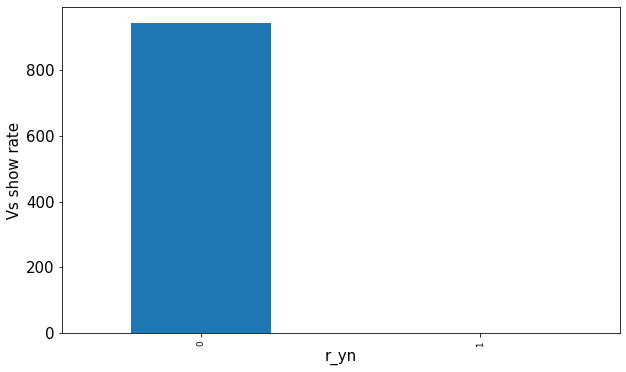

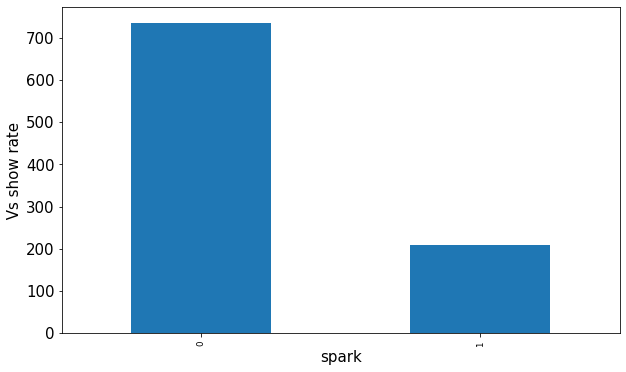

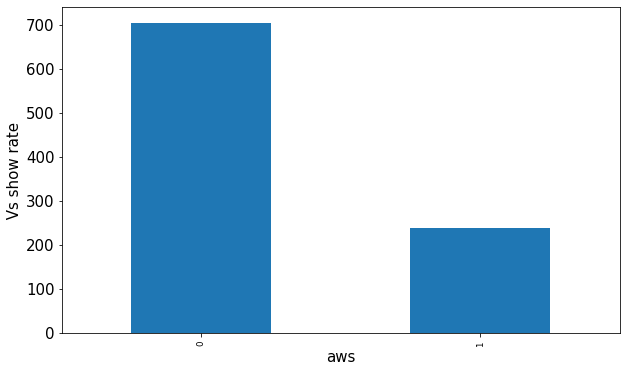

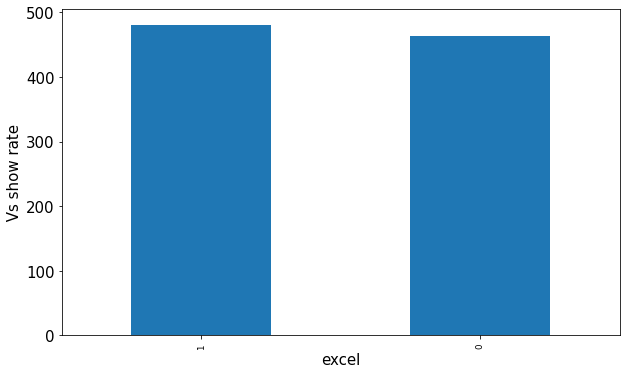

In [142]:
for i in df_cat.columns:
    plt.figure(figsize=(10,6))
    cat_num = df_cat[i].value_counts()[:15].plot(kind = 'bar',fontsize = 15);
    cat_num.set_xticklabels(cat_num.get_xticklabels(),rotation = 90, fontsize = 8.6);
    plt.xlabel(i,fontsize = 15);
    plt.ylabel(' Vs show rate ',fontsize = 15);
    plt.show()
    print("\n")